
# 🚀 Model Training (Data Quality, Cross Validation, Overfitting)

This notebook serves as an interactive demonstration of fundamental machine learning concepts, focusing on how to evaluate a model's stability and *how data quality* (noise) fundamentally limits performance.

We will focus on a Regression Problem—predicting a continuous numerical value—using the powerful techniques of Train-Test Splitting and K-Fold Cross-Validation (CV).

## 🎯Key Objectives
- Data Split: Correctly separate continuous data into training and testing sets.

- Model Validation: Use Cross-Validation with the appropriate metric (RMSE) to get a reliable, non-biased performance estimate.

- Data Quality Comparison: Compare model performance (RMSE) on a Low-Noise dataset vs. a High-Noise dataset.

- Overfitting Diagnosis: Use a Learning Curve to visually diagnose high variance (overfitting) in the presence of noisy data.

 ### 1.Import Modules

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # For visualization
import seaborn as sns           # For visualization

# Scikit-learn essentials for splitting, CV, and modeling
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error, make_scorer

# Configuration
plt.style.use('ggplot')
%matplotlib inline

### 2.Loading low noise dataset

In [5]:
# Load the dataset
df_low = pd.read_csv("low_noise_data.csv") 
print(f"Initial rows (Low Noise): {len(df_low)}")

# Define Features (X) and Target (y)
X_low = df_low.drop('target_variable', axis=1) 
y_low = df_low['target_variable']

Initial rows (Low Noise): 50000


### 3.Splitting of data

In [8]:
# Perform the Split (80% Train, 20% Test)
X_train_low, X_test_low, y_train_low, y_test_low = train_test_split(
    X_low, y_low, 
    test_size=0.2, 
    random_state=42, 
)

print("-" * 40)
print(f"Training set size: {X_train_low.shape[0]} rows ({X_train_low.shape[0]/len(df_low):.0%})")
print(f"Testing set size: {X_test_low.shape[0]} rows ({X_test_low.shape[0]/len(df_low):.0%})")

----------------------------------------
Training set size: 40000 rows (80%)
Testing set size: 10000 rows (20%)


### 4.Assigning the model and Cross fold verification

In [14]:

# 1. Initialize the correct model type: Regressor
model_low = DecisionTreeRegressor(random_state=42)

# Define the scoring metric for Regression (Root Mean Squared Error is common)
# Scikit-learn CV typically uses 'negative' metrics, so we transform MSE.
rmse_scorer = make_scorer(mean_squared_error, greater_is_better=False)

# 2. Perform 5-Fold Cross-Validation on the training data
# Note: X_train and y_train are assumed to be defined by the corrected split (without stratify)
cv_scores_low = cross_val_score(
    model_low, 
    X_train_low, 
    y_train_low, 
    cv=5, 
    scoring=rmse_scorer  # Use the RMSE scoring metric
)

# Convert negative score back to positive Root Mean Squared Error (RMSE) for interpretability
cv_rmse_scores = np.sqrt(-cv_scores_low)

print(f"CV RMSE Scores for each fold (Low Noise): {cv_rmse_scores}")
print("-" * 40)
print(f"Average CV Root Mean Squared Error (Low Noise): {cv_rmse_scores.mean():.4f}")

CV RMSE Scores for each fold (Low Noise): [1.29953372 1.294129   1.30570339 1.30341416 1.30068205]
----------------------------------------
Average CV Root Mean Squared Error (Low Noise): 1.3007


### 5. Loading high noise data

In [16]:
# Load the high noise dataset
df_high = pd.read_csv("high_noise_data.csv")

# Define Features (X) and Target (y)
X_high = df_high.drop('target_variable', axis=1) 
y_high = df_high['target_variable']

### 6. Splitting 

In [17]:
# Perform the Split (80% Train, 20% Test)
X_train_high, X_test_high, y_train_high, y_test_high = train_test_split(
    X_high, y_high, 
    test_size=0.2, 
    random_state=42, 
)

### 7. Assigning the same model and cross verification

In [19]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, make_scorer
import numpy as np

# 1. Initialize the correct model type: Regressor (This is correct)
model_high = DecisionTreeRegressor(random_state=42)

# Define the scoring metric for Regression (Root Mean Squared Error)
# We use make_scorer to ensure compatibility with cross_val_score
rmse_scorer = make_scorer(mean_squared_error, greater_is_better=False)

# 2. Perform 5-Fold Cross-Validation on the training data
 cv_scores_high = cross_val_score(
    model_high, 
    X_train_high, 
    y_train_high, 
    cv=5, 
    scoring=rmse_scorer # <-- CORRECTED METRIC
)

# Convert negative score back to positive Root Mean Squared Error (RMSE)
cv_rmse_scores_high = np.sqrt(-cv_scores_high)

print(f"CV RMSE Scores for each fold (High Noise): {cv_rmse_scores_high}")
print("-" * 40)
print(f"Average CV Root Mean Squared Error (High Noise): {cv_rmse_scores_high.mean():.4f}")

CV RMSE Scores for each fold (High Noise): [7.39944606 7.23068981 7.34589927 7.32802997 7.3108402 ]
----------------------------------------
Average CV Root Mean Squared Error (High Noise): 7.3230


### 8. Learning curve to show Overfitting

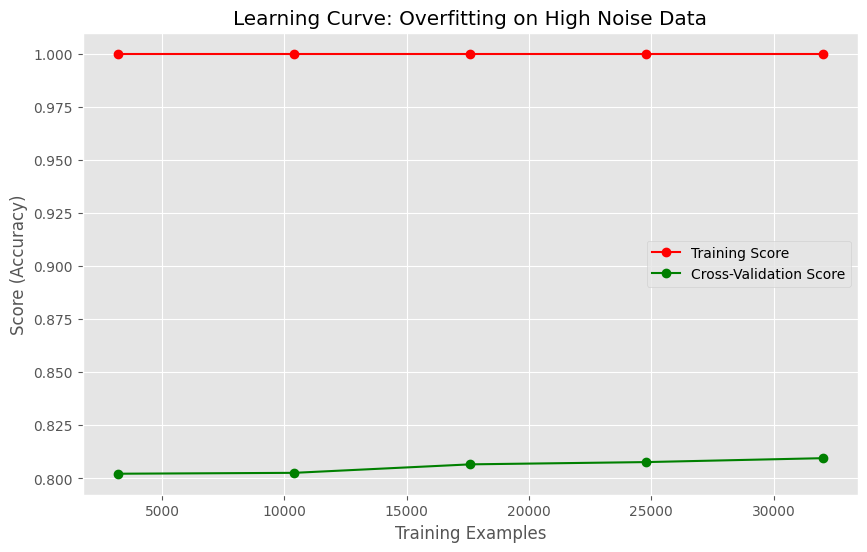

In [20]:
# Helper function to plot the learning curve
def plot_learning_curve(estimator, title, X, y, cv=5):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=-1,
        train_sizes=np.linspace(0.1, 1.0, 5)
    )

    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training Score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-Validation Score")

    plt.title(title)
    plt.xlabel("Training Examples")
    plt.ylabel("Score (Accuracy)")
    plt.legend(loc="best")
    plt.grid(True)
    plt.show()

# Plot curve for the high-noise model
# This model is likely overfitting because it is unconstrained (max_depth is not set)
plot_learning_curve(model_high, "Learning Curve: Overfitting on High Noise Data", X_train_high, y_train_high)